In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('Display.max_colwidth', None)
df = pd.read_csv('news.csv')

C:\Users\willi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\willi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\willi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
len(df)

6335

<AxesSubplot:>

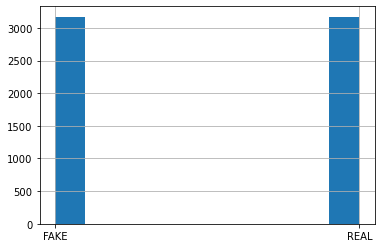

In [3]:
df['label'].hist()

In [5]:
import re
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import RegexpParser
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('Punkt')
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading Punkt: Package 'Punkt' not found in index


In [6]:
def lower(text):
    new_text = text.lower()
    return new_text

In [7]:
def remove_punc(text):
    new_text = re.sub(r'[^\w\s]', '',text)
    return new_text    

In [8]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    new_text = ' '.join(word for word in text.split() if word not in stop)
    return new_text

In [9]:
def tokens(text):
    new_text = nltk.word_tokenize(text)
    new_text = ' '.join(new_text)
    return new_text

In [10]:
def sent_tokens(text):
    new_text = nltk.sent_tokenize(text)
    new_text = ' '.join(new_text)
    return new_text

In [11]:
df['new_title'] = df['title'].apply(lambda x: x.lower())

In [12]:
df['new_title'] = df['new_title'].apply(remove_punc)

In [13]:
df['new_title'] = df['new_title'].apply(remove_stopwords)

In [14]:
df['new_text'] = df['text'].apply(lambda x: x.lower())

In [15]:
df['new_text'] = df['new_text'].apply(remove_punc)

In [16]:
df['new_text'] = df['new_text'].apply(remove_stopwords)

In [17]:
df['new_title'] = df['new_title'].apply(tokens)

In [19]:
df['new_text'] = df['new_text'].apply(sent_tokens)

In [20]:
df['new_text'] = df['new_text'].apply(tokens)

In [29]:
# ## wordcloud more detailed after tokenization
# import wordcloud
# from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
# from PIL import Image

In [30]:
# stopwords = set(STOPWORDS)

In [31]:
# fake_text = df[df['label'] == 'FAKE']

In [32]:
# real_text = df[df['label'] == 'REAL']

In [33]:
# real_txt = real_text['new_text']

In [34]:
# real_title = real_text['new_title']

In [35]:
# real_title = str(real_title)

In [36]:
# real_txt = str(real_txt)

In [37]:
# fake_txt = fake_text['new_text']

In [38]:
# fake_title = fake_text['new_title']

In [39]:
# fake_title = str(fake_title)

In [40]:
# fake_txt = str(fake_txt)

In [21]:
# plt.figure(figsize=(15,12))
# wc = WordCloud().generate(fake_txt)
# plt.imshow(wc, interpolation='bilinear' )
# plt.axis('off')
# plt.title('Fake article')
# plt.show()

# plt.figure(figsize=(15,12))
# wc = WordCloud().generate(fake_title)
# plt.imshow(wc, interpolation='bilinear' )
# plt.axis('off')
# plt.title('Fake title')
# plt.show()

In [22]:
# plt.figure(figsize=(15,12))
# wc = WordCloud(stopwords=stopwords).generate(real_txt)
# plt.imshow(wc, interpolation='bilinear' )
# plt.axis('off')
# plt.title('Real article')
# plt.show()

# plt.figure(figsize=(15,12))
# wc = WordCloud(stopwords=stopwords).generate(real_title)
# plt.imshow(wc, interpolation='bilinear' )
# plt.axis('off')
# plt.title("Real title")
# plt.show()

In [23]:
training_data = df[['new_title','label']]

In [24]:
training_data.head()

,new_title,label
0,smell hillarys fear,FAKE
1,watch exact moment paul ryan committed political suicide trump rally video,FAKE
2,kerry go paris gesture sympathy,REAL
3,bernie supporters twitter erupt anger dnc tried warn,FAKE
4,battle new york primary matters,REAL


In [25]:
len(df)

6335

In [26]:
training_data['label'] = training_data['label'].replace({'FAKE': 1, 'REAL':0})

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
train = training_data[0:5068]

In [28]:
test = training_data[5068:6335]

In [29]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()

In [30]:
train_data = vec.fit_transform(train['new_title'])

In [31]:
#vec.idf_

In [32]:
vec.vocabulary_

{'smell': 7713,
 'hillarys': 3985,
 'fear': 3239,
 'watch': 9068,
 'exact': 3031,
 'moment': 5409,
 'paul': 6080,
 'ryan': 7231,
 'committed': 1829,
 'political': 6296,
 'suicide': 8093,
 'trump': 8598,
 'rally': 6709,
 'video': 8923,
 'kerry': 4642,
 'go': 3678,
 'paris': 6034,
 'gesture': 3629,
 'sympathy': 8199,
 'bernie': 1019,
 'supporters': 8121,
 'twitter': 8664,
 'erupt': 2965,
 'anger': 570,
 'dnc': 2615,
 'tried': 8570,
 'warn': 9041,
 'battle': 946,
 'new': 5641,
 'york': 9302,
 'primary': 6459,
 'matters': 5193,
 'tehran': 8286,
 'usa': 8823,
 'girl': 3648,
 'horrified': 4066,
 'watches': 9070,
 'boyfriend': 1220,
 'left': 4844,
 'facetime': 3151,
 'britains': 1282,
 'schindler': 7324,
 'dies': 2484,
 '106': 18,
 'fact': 3155,
 'check': 1609,
 'clinton': 1723,
 'commanderinchief': 1815,
 'forum': 3457,
 'iran': 4432,
 'reportedly': 6967,
 'makes': 5081,
 'push': 6627,
 'uranium': 8817,
 'concessions': 1872,
 'nuclear': 5738,
 'talks': 8234,
 'three': 8384,
 'clintons': 1727

In [33]:
test_data = vec.transform(test['new_title'])

In [34]:
X_train = train_data
X_test = test_data
y_train = train.label
y_test = test.label

In [35]:
rt = RandomForestClassifier(n_estimators = 2000, criterion = 'gini', max_features='log2', random_state=1)

In [36]:
rt.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=2000, random_state=1)

In [37]:
preds = rt.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve

In [39]:
accuracy_score(y_test, preds)

0.8121546961325967

In [40]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       623
           1       0.80      0.84      0.82       644

    accuracy                           0.81      1267
   macro avg       0.81      0.81      0.81      1267
weighted avg       0.81      0.81      0.81      1267



Text(33.0, 0.5, 'Actual')

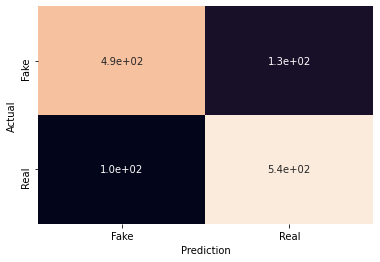

In [41]:
c = confusion_matrix(y_test, preds)
ax = sns.heatmap(c, annot=True, xticklabels=['Fake','Real'],yticklabels=['Fake','Real'],cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

In [42]:
confusion_matrix(y_test, preds)

array([[490, 133],
       [105, 539]], dtype=int64)

In [43]:
FPR, TPR, _ = roc_curve(y_test, preds)

Text(0, 0.5, 'TPR')

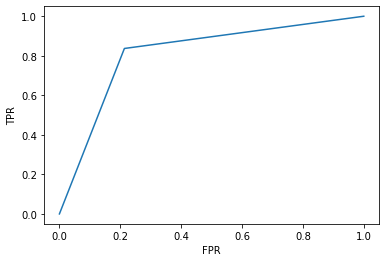

In [44]:
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [45]:
preds[:10]

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [46]:
df_test= df[['title', 'new_title', 'label']]
df_test.iloc[:10]

,title,new_title,label
0,You Can Smell Hillary’s Fear,smell hillarys fear,FAKE
1,Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO),watch exact moment paul ryan committed political suicide trump rally video,FAKE
2,Kerry to go to Paris in gesture of sympathy,kerry go paris gesture sympathy,REAL
3,Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!',bernie supporters twitter erupt anger dnc tried warn,FAKE
4,The Battle of New York: Why This Primary Matters,battle new york primary matters,REAL
5,"Tehran, USA",tehran usa,FAKE
6,Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On,girl horrified watches boyfriend left facetime,FAKE
7,‘Britain’s Schindler’ Dies at 106,britains schindler dies 106,REAL
8,Fact check: Trump and Clinton at the 'commander-in-chief' forum,fact check trump clinton commanderinchief forum,REAL
9,Iran reportedly makes new push for uranium concessions in nuclear talks,iran reportedly makes new push uranium concessions nuclear talks,REAL


In [47]:
def predict(x):
    x = vec.transform([x])
    x = x.toarray()
    pred = rt.predict(x)
    return pred    

In [48]:
predict('donald trump wins election')

array([0], dtype=int64)

In [49]:
predict('reports on debate tonight')

array([0], dtype=int64)

In [50]:
predict('drinking bleach cures covid')

array([1], dtype=int64)

In [51]:
#when i changed this from is or isis to the islamic state it went from fake to real
predict('islamic state spreads across north africa')

array([0], dtype=int64)

In [88]:
import pickle
filename = 'RandmForest_model'
pickle.dump(rt,open(filename, 'wb'))

In [89]:
filename2 = 'tfidfbasic_model'
pickle.dump(vec,open(filename2, 'wb'))